In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

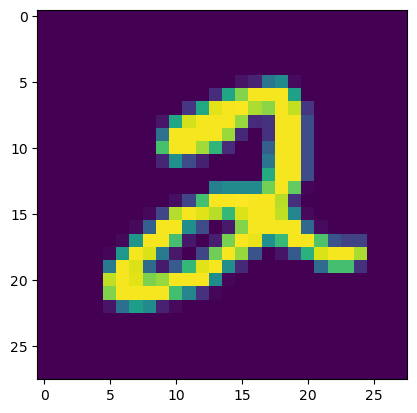

In [5]:
x_train[0]
plt.imshow(x_train[5])

### Data preprocessing

In [6]:
size = x_train.shape[1]
input_size = size*size
input_size

784

In [7]:
x_train = x_train.reshape(-1,input_size)
x_train = x_train.astype("float32")/255
x_test =x_test.reshape(-1,input_size)
x_test = x_test.astype("float32")/255

In [8]:
x_train.shape

(60000, 784)

In [9]:
model = Sequential([
    Input(shape=(784,)),
    Dense(50,activation="relu",name="layer1"),
    Dense(25,activation="relu",name="layer2"),
    Dense(10,activation="softmax",name="layer3"),
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2774 - accuracy: 0.9170
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1780 - accuracy: 0.9496
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1591 - accuracy: 0.9549
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1471 - accuracy: 0.9586
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1378 - accuracy: 0.9622
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1283 - accuracy: 0.9644
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1227 - accuracy: 0.9670
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1193 - accuracy: 0.9685
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9697
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.108

In [12]:
loss,accuracy = model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.2567 - accuracy: 0.9583


In [13]:
print(f"Accuracy: {accuracy*100}%")

Accuracy: 95.8299994468689%
